# A look at Arrival/Departure delays of flights
## by Vijaya lakshmi Venkatraman

## Investigation Overview

In this presentation, I want to showcase the factors that affect arrival and departure delays of flights. The main focus is on factors such as flight duration, day of month, day of week and also some insights on cancellations and diversions.

## Dataset Overview

The dataset under analysis is from http://stat-computing.org/dataexpo/2009/the-data.html <br>
There are 29 features present initially but this has been checked for tidiness and quality issues as a result of which the number of columns have been reduced.

In [1]:
# import all packages and set plots to be embedded inline
import os
import glob
import pandas as pd
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import os.path
from os import path

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
os.chdir(".\Downloads\FLIGHTS")
df = pd.read_csv('master_file.csv')

## Reasons for flight cancellations

The major reason for cancellation is Security followed by Carrier, Weather and lastly National Air System.

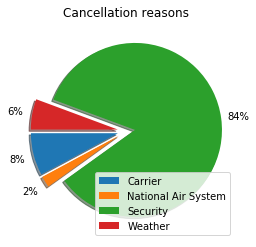

In [3]:
sizes = df.MONTH.groupby(df.CANCELLATION_CODE).sum()
labels = sizes.keys()
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(sizes, autopct='%1.0f%%', explode=explode, pctdistance=1.2, shadow=True, startangle=180)
plt.title('Cancellation reasons')
plt.legend(labels, loc="lower right")

## Which carrier has the most number of flight diversions?

United Airlines comes first in terms of flight diversions. The other carriers in the top 5 are Delta Airlines, American airlines, Southwest airlines and Skywest airlines.

Text(0.5, 1.0, 'Top 5 carriers who had the most number of flight diversions')

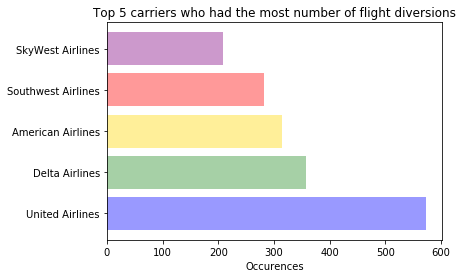

In [4]:
df_temp_1 = df[df['DIVERTED'] == 1]
most_diverted_carrier = df_temp_1.MONTH.groupby(df_temp_1.OP_UNIQUE_CARRIER).count()
labels = ['United Airlines', 'Delta Airlines', 'American Airlines', 'Southwest Airlines', 'SkyWest Airlines']

y_pos = np.arange(len(labels))
data = most_diverted_carrier.nlargest(5)
clr = ('blue', 'forestgreen', 'gold', 'red', 'purple')

h = plt.barh(y_pos, data, align='center', 
alpha=0.4, label=labels, color=clr)
plt.yticks(y_pos, labels)
plt.xlabel('Occurences')
plt.title('Top 5 carriers who had the most number of flight diversions')

## Which carrier has the most number of flight cancellations?

Southwest airlines has the most number of flight cancellations followed by Delta, American, United and Skywest. Note that the set of carriers that had the most number of flight diversions is the same as the ones that had the most number of cancellations too. However the ranking differs in each of the cases.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

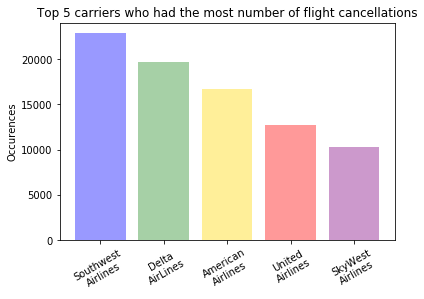

In [5]:
df_temp_2 = df[df['CANCELLED'] == 1]
most_cancelled_carrier = df_temp_2.MONTH.groupby(df_temp_2.OP_UNIQUE_CARRIER).count()
y_pos = np.arange(len(labels))
data = most_cancelled_carrier.nlargest(5)
clr = ('blue', 'forestgreen', 'gold', 'red', 'purple')
labels = ['Southwest\nAirlines','Delta\nAirLines','American\nAirlines','United\nAirlines','SkyWest\nAirlines']

h = plt.bar(y_pos, data, align='center', 
alpha=0.4, label=labels, color=clr)
plt.xticks(y_pos, labels)
plt.ylabel('Occurences')
plt.title('Top 5 carriers who had the most number of flight cancellations')
plt.xticks(rotation=30)

## What are the cities that had the most number of flight cancellations?
Chicago, Atlanta, New York, Dallas and Denver are the top 5 cities with most number of flight cancellations. This is inline with the fact that they are also featuring in the busiest cities in USA. 

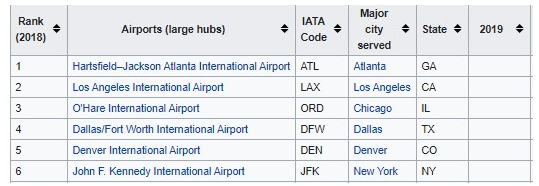

Text(0.5, 1.0, 'Cities with most number of flights cancellations')

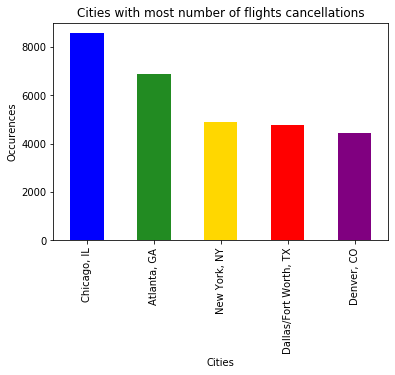

In [6]:
df_temp_2 = df[df['CANCELLED'] == 1]
most_cancelled_carrier = df_temp_2.MONTH.groupby(df_temp_2.ORIGIN_CITY_NAME).count()
colors = ('blue', 'forestgreen', 'gold', 'red', 'purple')

most_cancelled_carrier.nlargest(5).plot(kind='bar', color=colors)
plt.xlabel('Cities')
plt.ylabel('Occurences')
plt.title('Cities with most number of flights cancellations')

## What day of the month is the worst day to travel?
The worst day to travel is in the middle of the month, especially on the 13th because the delays tend to peak around this day.

Text(0, 0.5, 'Departure delay')

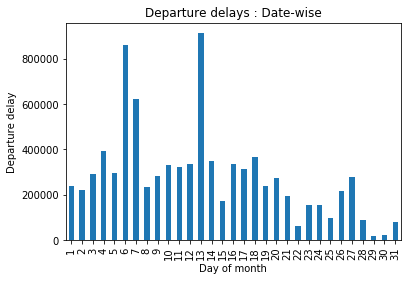

In [7]:
df.groupby(['DAY_OF_MONTH']).sum()['DEP_DELAY'].plot(kind='bar')
plt.title('Departure delays : Date-wise')
plt.xlabel('Day of month')
plt.ylabel('Departure delay')

## What day of the week is the worst to travel?
The delays are lesser in the starting of the week (i.e., from Monday) and it gets worse towards the end of the week.

Text(0, 0.5, 'Departure delay')

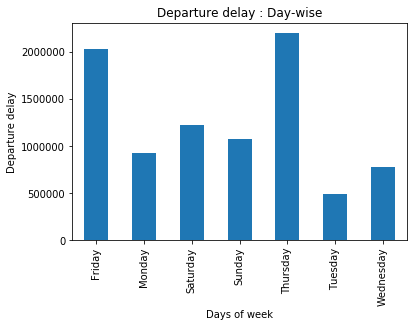

In [8]:
df.groupby(['DAY_OF_WEEK']).sum()['DEP_DELAY'].plot(kind='bar')
plt.title('Departure delay : Day-wise')
plt.xlabel('Days of week')
plt.ylabel('Departure delay')

## How does arrival and departure delay correlate?
The arrival and departure delays seem to have a positive relationship i.e., if arrival delay increases, departure delay increases too. This is seen when both mean data is used and the entire data is used.

Text(36.10836588541667, 0.5, 'Departure delay')

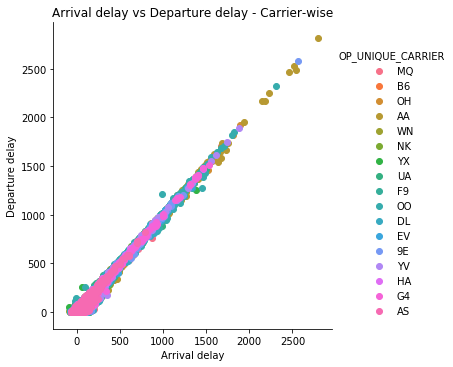

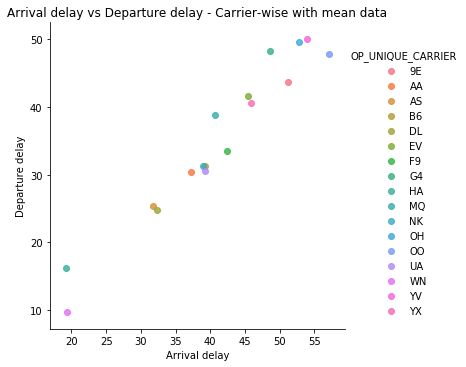

In [9]:
df_temp = df[df['ARR_DELAY'] > 0]
df_temp = df[df['DEP_DELAY'] > 0]
g = sns.FacetGrid(data = df_temp, hue = 'OP_UNIQUE_CARRIER', height = 5)
g.map(plt.scatter, 'ARR_DELAY', 'DEP_DELAY')
g.add_legend()
plt.title('Arrival delay vs Departure delay - Carrier-wise')
plt.xlabel('Arrival delay')
plt.ylabel('Departure delay')

carrier_averages = df_temp.groupby('OP_UNIQUE_CARRIER').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).reset_index()
sns.lmplot('DEP_DELAY', 'ARR_DELAY', data=carrier_averages,
           fit_reg=False, hue='OP_UNIQUE_CARRIER', )
plt.title('Arrival delay vs Departure delay - Carrier-wise with mean data')
plt.xlabel('Arrival delay')
plt.ylabel('Departure delay')

In [11]:
!jupyter nbconvert Project_Flights_Data_Slide_Deck.ipynb --to slides --post serve --template output_toggle

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in 

[NbConvertApp] WARNING | pattern 'Project_Flights_Data_Slide_Deck.ipynb' matched no files
